In [1]:
from test import  *

# Installation

In [2]:
import numpy as np
from numpy.linalg import svd
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

# Introduction

Engineering applications of linear algebra are everywhere: electric circuits, statics and dynamics, digital signal processing, optimization, robotics, multi-body dynamics… you name it!


- For physicists, a vector is an "arrow" of a given length (magnitude) and direction. It can represent directional quantities like velocity, force, acceleration.

- For computer scientists, a vector is an ordered list of numbers. It can represent a set of variables or features stored in order.

- For mathematicians, vectors are generic objects that behave a certain way when they are added or scaled


**What is vector**

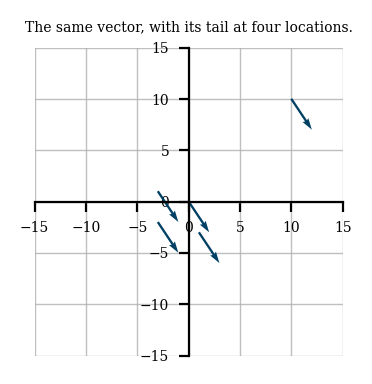

In [3]:
# move 2 co-ordinate in x direction and 3 co-ordinate in y-direction
vectors = [(2,-3)]  

# starting points
tails = [(10,10),(-3,-2), (-3,1), (0,0), (1,-3)]

plot_vector(vectors, tails)
plt.title("The same vector, with its tail at four locations.");
plt.show();

`norm:` 
> By default represent vector as Column Vector

> by default we assume every vector as origin

# Operations

## addition

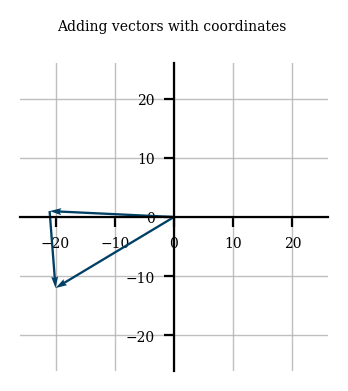

In [4]:
a = numpy.array((-21,1))
b = numpy.array((1,-13))
origin = numpy.array((0,0))

vectors = [a, b, a+b]
tails   = [origin, a, origin]
plot_vector(vectors, tails)
plt.title("Adding vectors with coordinates \n");

## scaling

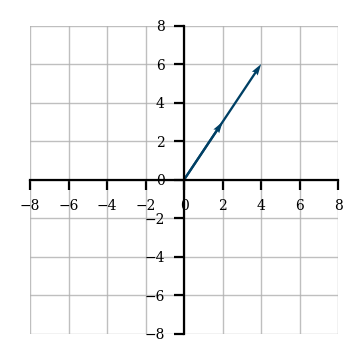

In [5]:
c = np.array((2,3))
vectors = [c,2*c]
plot_vector(vectors)

will talk more in future lesson in Eigen and SVD and in terms of Diagnalization 

### Unit vector

In [6]:
i = np.array((1,0))
j = np.array((0,1))

scale in x-axis: [1.2 3. ]
scale in y-axis: [3.  1.2]
matrix:
[[1.2 3. ]
 [3.  1.2]] 



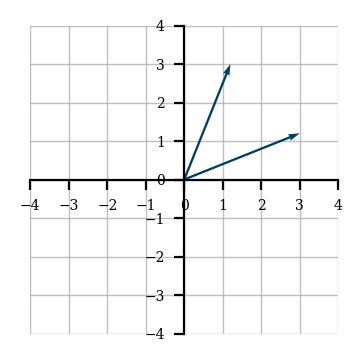

In [7]:
matrix = np.array([
    [1.2,3],
    [3,1.2]
])

print(f"scale in x-axis: {matrix.dot(i)}")
print(f"scale in y-axis: {matrix.dot(j)}")

print(f"matrix:\n{matrix} \n")

plot_vector(matrix)

### change unit vector and check

scale in x-axis: [ 6. 15.]
scale in y-axis: [3.  1.2]
matrix:
[[1.2 3. ]
 [3.  1.2]] 

scaled matrix:
[[ 6.  15. ]
 [ 3.   1.2]]


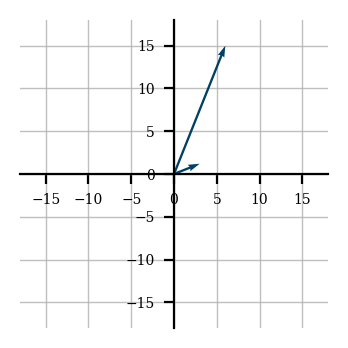

In [8]:
i = np.array((5,0))
j = np.array((0,1))

print(f"scale in x-axis: {matrix.dot(i)}")
print(f"scale in y-axis: {matrix.dot(j)}")

print(f"matrix:\n{matrix} \n")
scaled_matrix = np.stack([matrix.dot(i),matrix.dot(j)])
print(f"scaled matrix:\n{scaled_matrix}")

plot_vector([matrix.dot(i),matrix.dot(j)])

**Normal Vector**

In [9]:
i = np.array([1,0])
j = np.array([0,1])

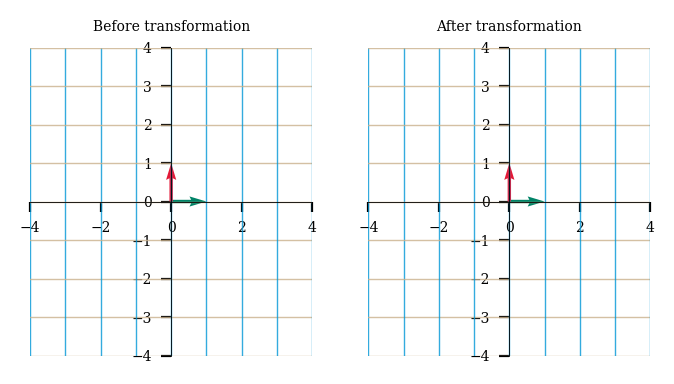

In [10]:
# normal
plot_linear_transformation(np.stack([i,j]))

## shrinking

In [11]:
print(f"exploding : {(1.001)**99}")
print(f"vanishing : {(0.9)**99}")

exploding : 1.104011686034721
vanishing : 2.9512665430652825e-05


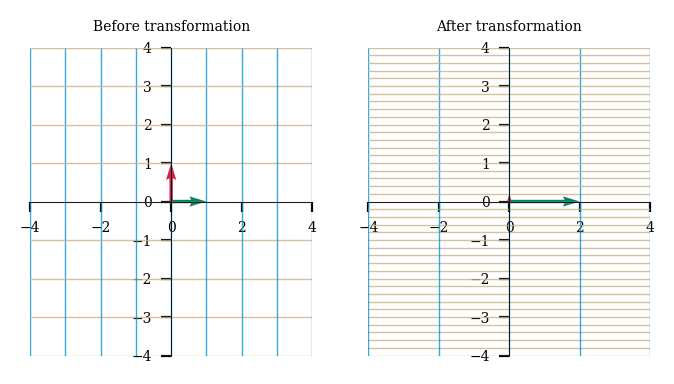

In [12]:
plot_linear_transformation(np.stack([[2,0],[0,0.2]]))

## strecthing

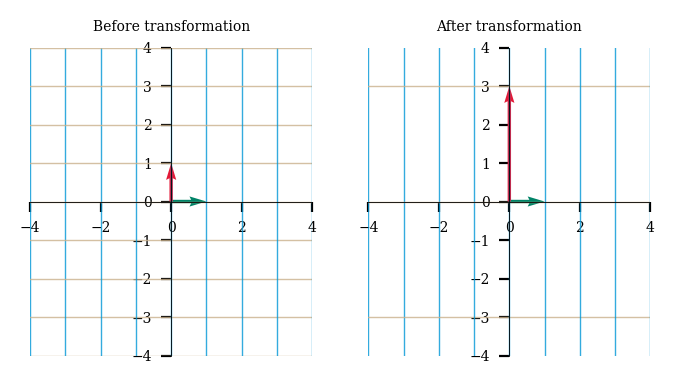

In [13]:
plot_linear_transformation(np.stack([i,[0,3]]))

## shearing

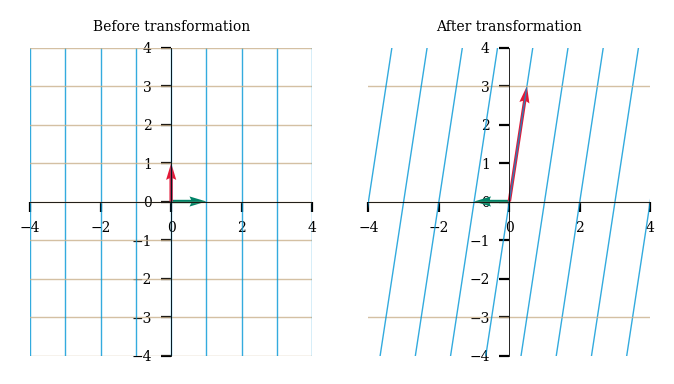

In [14]:
plot_linear_transformation(np.stack([[-1,.5],[0,3]]))

## relefcting: determinant<0

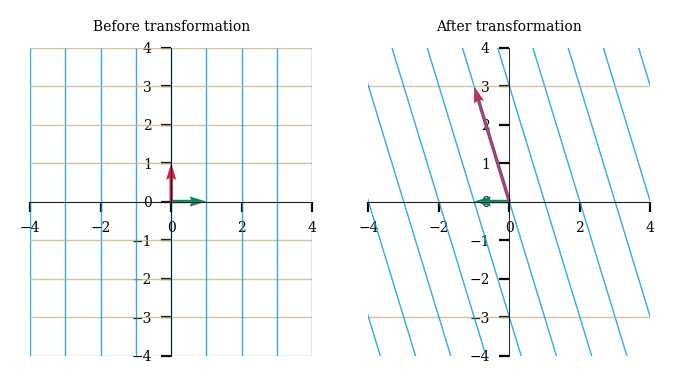

In [15]:
plot_linear_transformation(np.stack([[-1,-1],[0,3]]))

## rotation: orthonormal

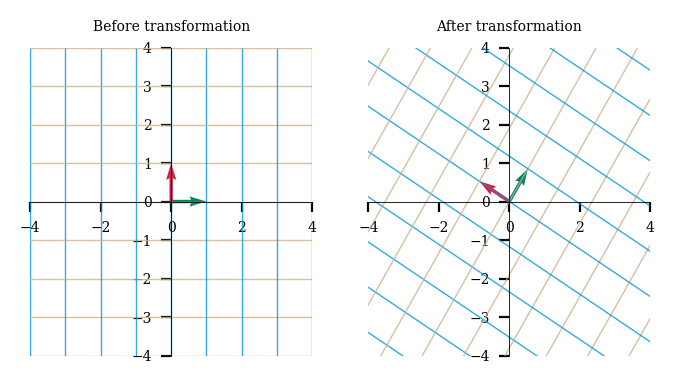

In [16]:
degree = 45

rotation_matrix = np.array([
    [np.cos(degree), -np.sin(degree)],
    [np.sin(degree), np.cos(degree)]
])

plot_linear_transformation( rotation_matrix )

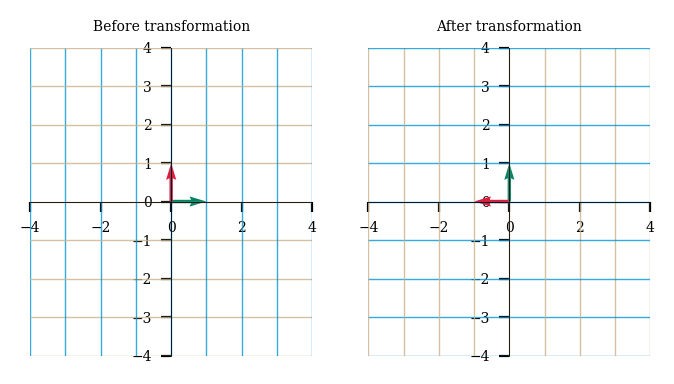

In [17]:
rotation_matrix = np.stack([[0,-1],[1,0]])
plot_linear_transformation(rotation_matrix)

**One more:: adding bias helps to shift distribution called Affine Transformation**

Intution
- rotation
- shear
- reflection
- scaling
- shifting

In [18]:
shear = np.array([[1,1],[0,1]])
shear

array([[1, 1],
       [0, 1]])

In [19]:
rotation_matrix = np.array([[ 0, -1],[ 1,  0]])
rotation_matrix

array([[ 0, -1],
       [ 1,  0]])

how my vector gonna behave if my I do matrix multiplication?? :blush:

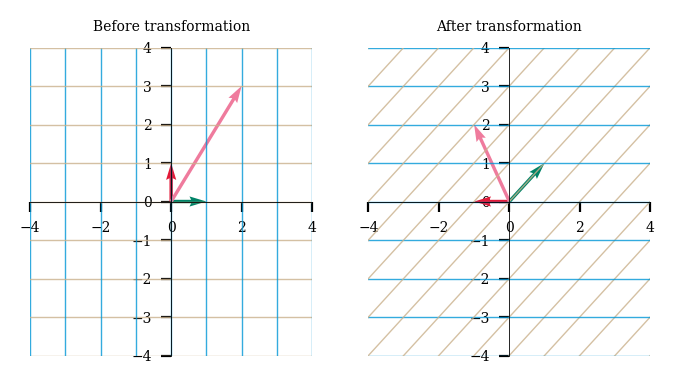

In [20]:
my_vector = np.array([2,3])
matrix_mul = np.matmul(shear,rotation_matrix) # shear@rotation_matrix

plot_linear_transformation(matrix_mul,my_vector)

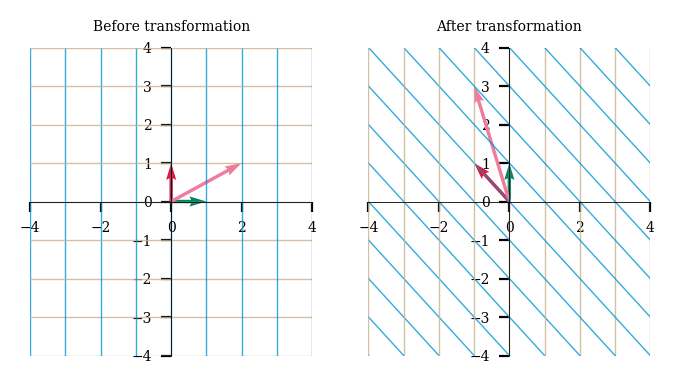

In [21]:
my_vector = np.array([2,1])
matrix_mul = np.matmul(rotation_matrix,shear) # shear@rotation_matrix

plot_linear_transformation(matrix_mul,my_vector)

#### `Inference:`  matrix multiplication is not commutative

**Example:**

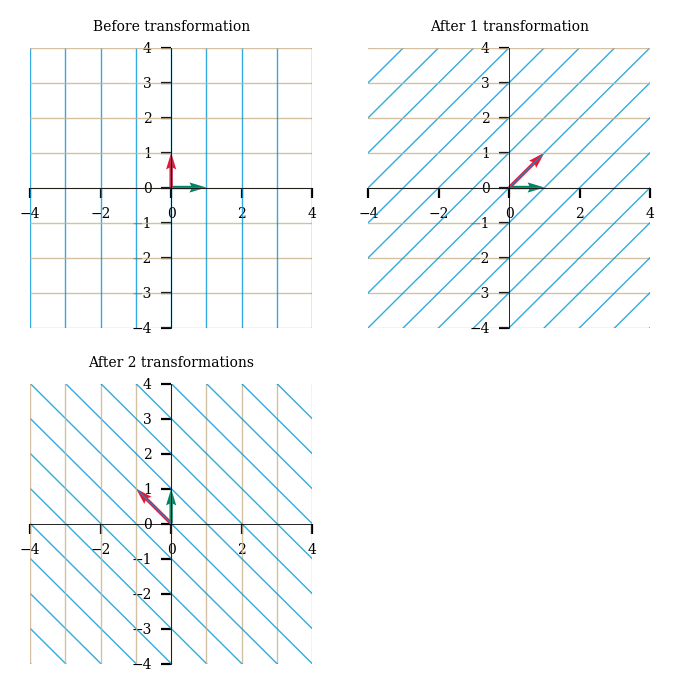

In [22]:
# shear and rotate space
plot_linear_transformations(shear,rotation_matrix)

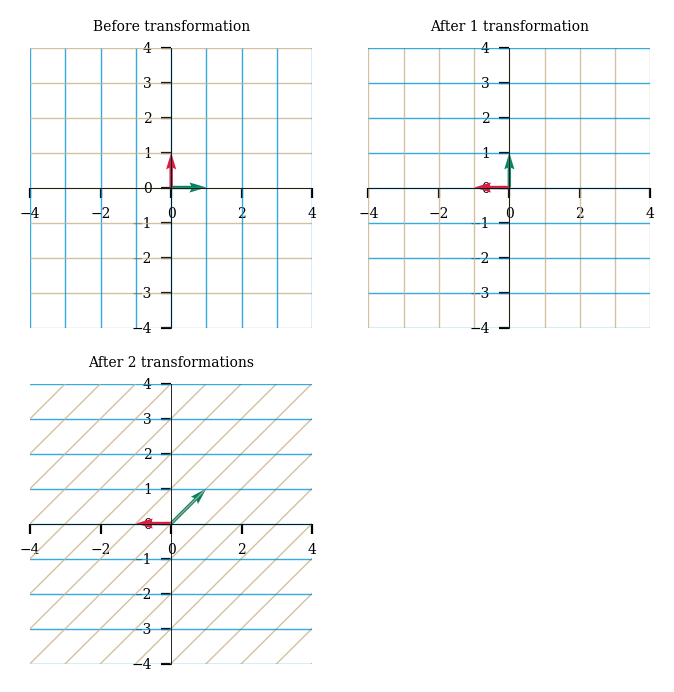

In [23]:
# rotate and shear space
plot_linear_transformations(rotation_matrix,shear)

Order matters So, **Inverse Matrix do it operation in reverse manner**

In [24]:
matrix = shear@rotation_matrix
matrix_inv = np.linalg.inv(shear@rotation_matrix)

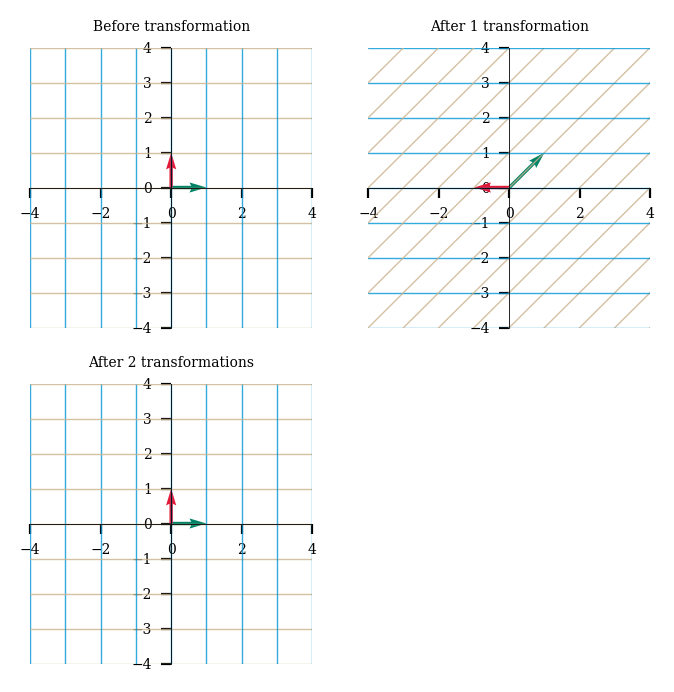

In [25]:
plot_linear_transformations(matrix,matrix_inv)

Identity matrix do nothing...

[[ 1  1]
 [-1  1]]


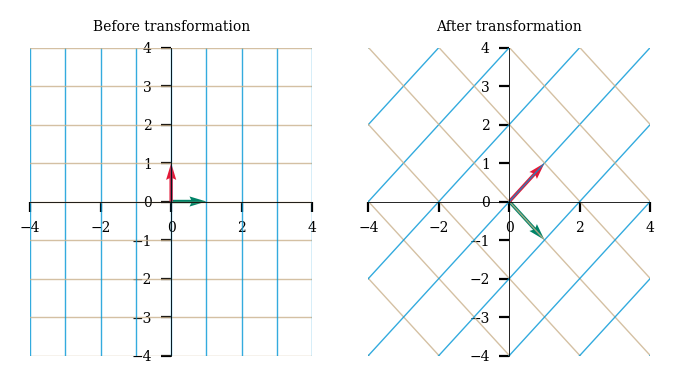

In [26]:
A = np.array([[1,1],[-1,1]])
print(A)
plot_linear_transformation(A)

# vector space

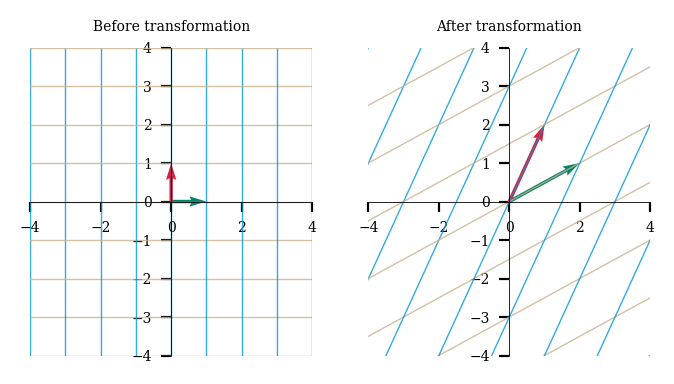

In [27]:
# your vector space gonna change like

C = numpy.array([[2,1], [1,2]])
plot_linear_transformation(C)

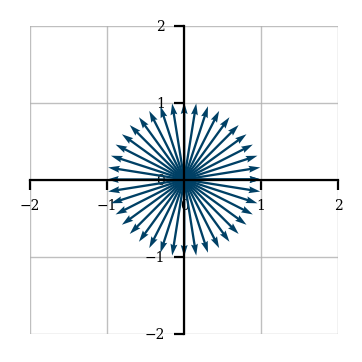

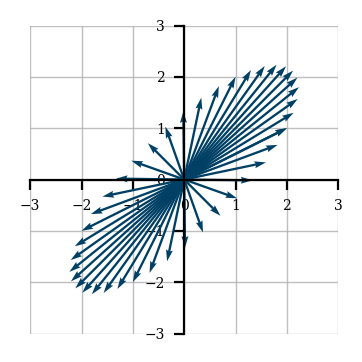

In [28]:
# what's happen in vector space

alpha = numpy.linspace(0, 2*numpy.pi, 41) 
vectors = list(zip(numpy.cos(alpha), numpy.sin(alpha)))

plot_vector(vectors)

newvectors = []
for i in range(len(vectors)):
    newvectors.append(C.dot(numpy.array(vectors[i])))

plot_vector(newvectors)

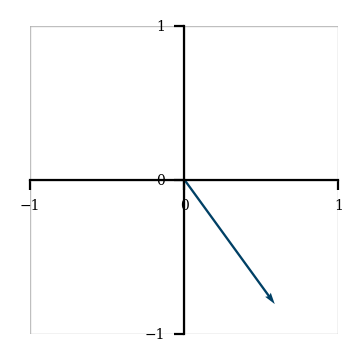

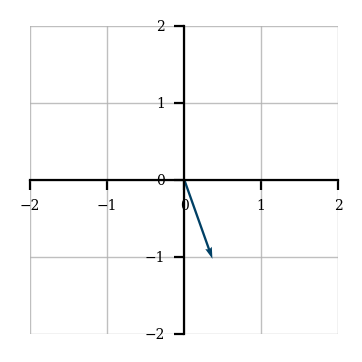

In [29]:
Nth_vector = int(input(f"enter favourite number a.k.a arrow but within {len(vectors)}: "))
plot_vector([vectors[Nth_vector]])

# run this cell how it's transforming
Nth_vector_change = C.dot(numpy.array(vectors[Nth_vector]))
plot_vector([Nth_vector_change])

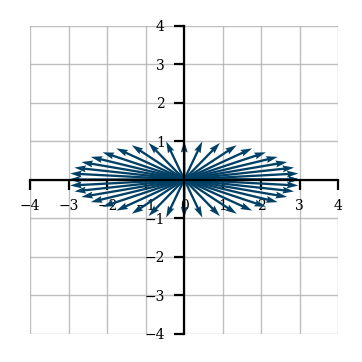

In [30]:
S = numpy.array([[3,0], [0,1]])
ellipse = []
for i in range(len(vectors)):
    ellipse.append(S.dot(numpy.array(vectors[i])))

plot_vector(ellipse)

## Vectors, OKay? check

To construct Plane, what we need...

    - point
    - norm of plane :(
    
What is norm of vector....?  pshhh!!!
what about two points?

<!-- because norm of plane always perpendicular to plane -->

Why can't we do?
System of linear equation

$$ A X = B$$
$$  X = A^{-1} B$$


Limitations:
--- 
- Equal unknowns equal variable... otherwise fail

- Possibilities:

    - Fat and Long Tail 
    


# Typical Example: 

- How to Represent Dataset in Equation classification setting $$D = { (x_i,y_i)^n_i ;  x_i∈R_d ; y_i∈(-1,1)}$$

- How to Represent Dataset in Equation regression setting $$D = { (x_i,y_i)^n_i ;  x_i∈R_d ; y_i∈R}$$



## General equation of Line, Plane, Hyperplane

##### Topic I

- plane passes through origin      $$W^T x=0$$
- plane not passes through origin/ perpendicular distance from origin to plane(a)  $$W^Tx+w0=0; where \, a=  \frac{-w0}{||W||}$$

##### Topic II

- Half Space  $$ W^T X + W0 <=> 0$$

##### Topic III

- distance between point and plane

$$d_q = \frac{W^T \, * \, X_q}{||W||}$$


- Two plane are parallel and equidistance from origin, what's distance ? $$= \frac{W_1+W_2}{||W||}$$ $$= \frac{2W}{||W||}$$
- Watch mentioned videos
    
    Best of best: http://3b1b.co/eola (highly highly recommended)

In [31]:
from IPython.display import Video

#go 2D to 5D

Video('./assets/matrix multiplication.mkv',width=620,height=450)

Input: 2D (x,y)

Output: 5D (R,O,Y,B,G)
    
    - e.g) Red = (1,0,0,0,0)

In linear algebra, we did our co-ordinate space crush , crumble and make like hill but our problem still finished :(

$$ f(W_i,W0) = \max \sum_{\forall i \in 1}^n  y_i * {{W^T*x_i + W }\over W};    W_i ∈ R_d and W ∈ R  $$

# Cosine Similarity

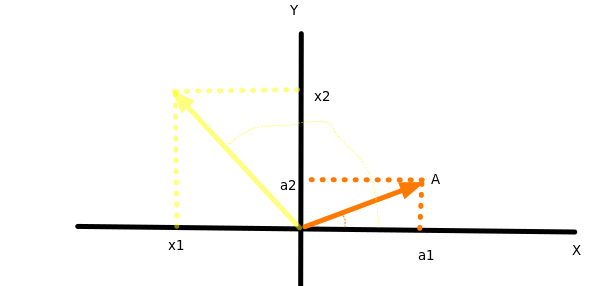


matrix connection to trignometry
    $$a^T*x = a1*x1 + a2*x2$$
    $$a^T*x = ||a|| cos \theta * ||x|| cos \theta + ||a|| sin\lambda * ||x|| sin \lambda$$
    $$a^T*x = ||a||* ||x|| * ( cos \theta cos \lambda + sin \theta* sin \lambda )$$
    $$a^T*x = ||a||* ||x|| * cos (\theta-\lambda)$$
    $$a^T*x = ||a||* ||x|| * cos \gamma$$

- Amazon Recommendation 2003

https://www.google.com/url?sa=t&source=web&rct=j&url=https://www.cs.umd.edu/~samir/498/Amazon-Recommendations.pdf&ved=2ahUKEwicqMip6tv8AhUyzDgGHdMDAbMQFnoECDAQAQ&usg=AOvVaw3m__k3kFLi6IgI98TtrXHB


- Physics: $$Work = Force*distance * cos \theta$$


# SVD
![Decomposition](./assets/decomposition%20matix.png)

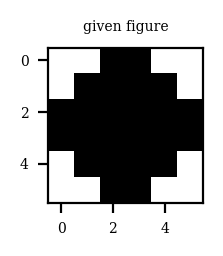

In [32]:
# Ugly rectangular matrix
#D = np.array([[1,0,1,1,0,1,1,0,0,1,1,0,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1],[1,0,1,0,1,1,0,1,1,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,1,1,1],[1,0,0,1,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,1,1,1],[1,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,1,1,1],[1,0,1,1,0,1,0,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,1,1,1,1], [1,0,1,1,1,0,0,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,0,0,1],])


# Square matrix
plt.figure(figsize=(1,3))
D = np.array([[0,0,1,1,0,0], [0,1,1,1,1,0], [1,1,1,1,1,1], [1,1,1,1,1,1], [0,1,1,1,1,0], [0,0,1,1,0,0], ])
imshow(1-D,cmap='gray')
plt.title('given figure')
plt.show()

In [33]:
U,S,VT = svd(D)

In [34]:
U.shape, S.shape, VT.shape

((6, 6), (6,), (6, 6))

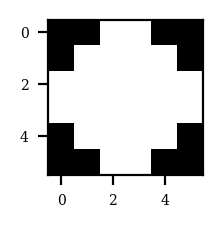

In [35]:
plt.figure(figsize=(1,3))
imshow(D,cmap='gray')
plt.show()

In [36]:
S= np.diag(S)

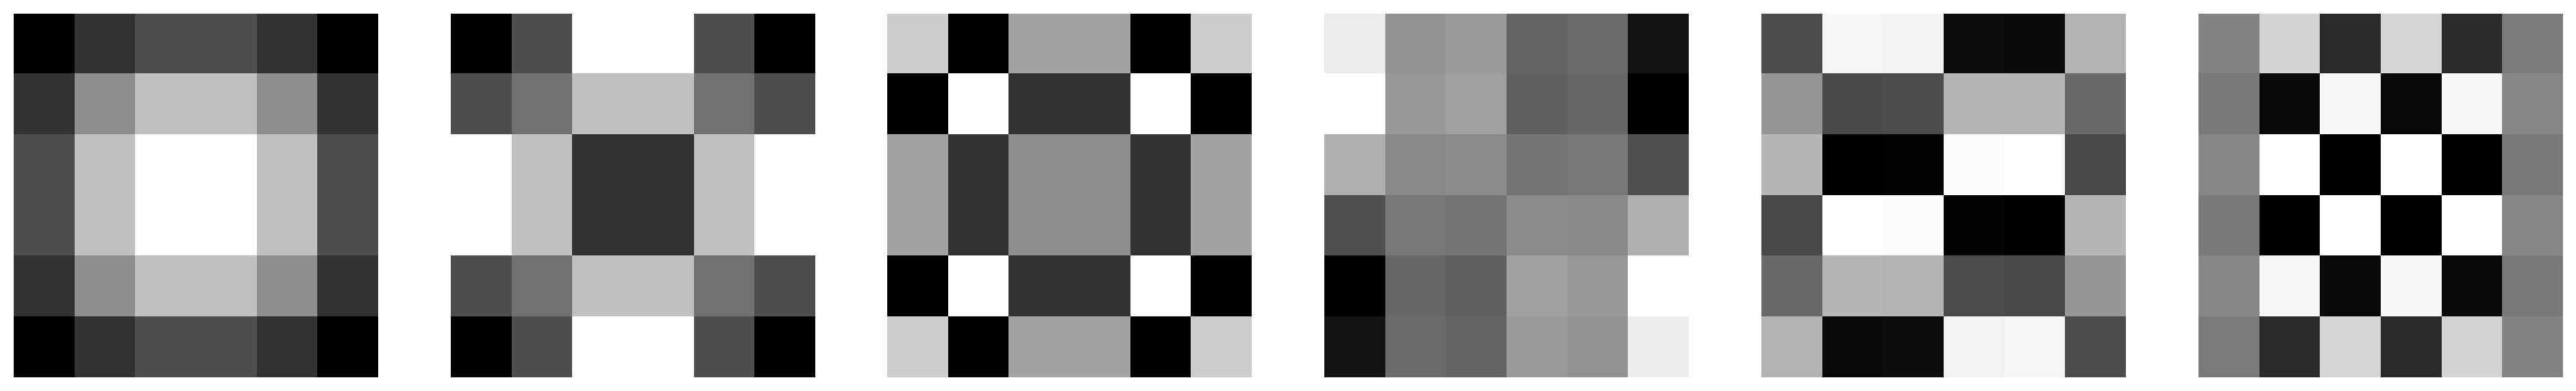

In [37]:
imgs = []
for i in range(len(S)): imgs.append(S.diagonal()[i] * np.outer(U[:,i],VT[i]) )

fig, axes = plt.subplots(figsize = (24,6), nrows = 1, ncols = len(D), sharex=True, sharey=True)
for num, ax in zip(range(len(D)), axes):
    ax.imshow(imgs[num], cmap='gray')
    ax.axis('OFF')
plt.show()

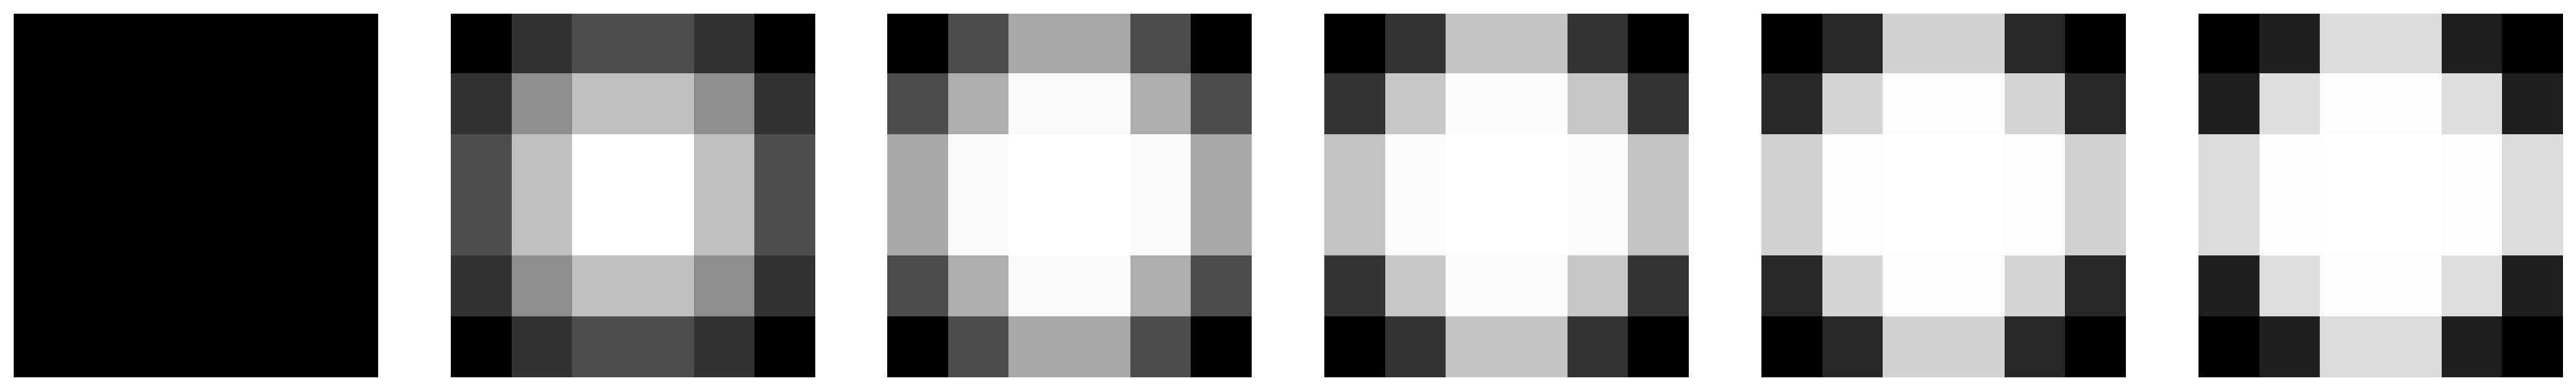

In [38]:
fig, axes = plt.subplots(figsize = (24,6), nrows = 1, ncols = len(U), sharex=True, sharey=True)
cumsum_values = np.zeros(shape=(6,6),dtype=np.float32)
for num,ax in zip(range(len(U)),axes):
    cumsum_values+= U[:,:num] @ S[0:num,:num] @ VT[:num,:]
    ax.imshow(cumsum_values, cmap='gray')
    ax.axis('OFF')
plt.show()

In [39]:
pd.DataFrame(
    [
        S.diagonal(),
        np.cumsum(S.diagonal()),
        (np.cumsum(S.diagonal()) / sum(S.diagonal()))*100
    ],
    index=['vaules of eign','cumulative sum','% of information'],columns=[1,2,3,4,5,6]).T

,vaules of eign,cumulative sum,% of information
1,4.493959e+00,4.493959,62.348980
2,1.603875e+00,6.097835,84.601074
3,1.109916e+00,7.207751,100.000000
4,1.002768e-16,7.207751,100.000000
5,7.987850e-17,7.207751,100.000000
6,8.270964e-18,7.207751,100.000000


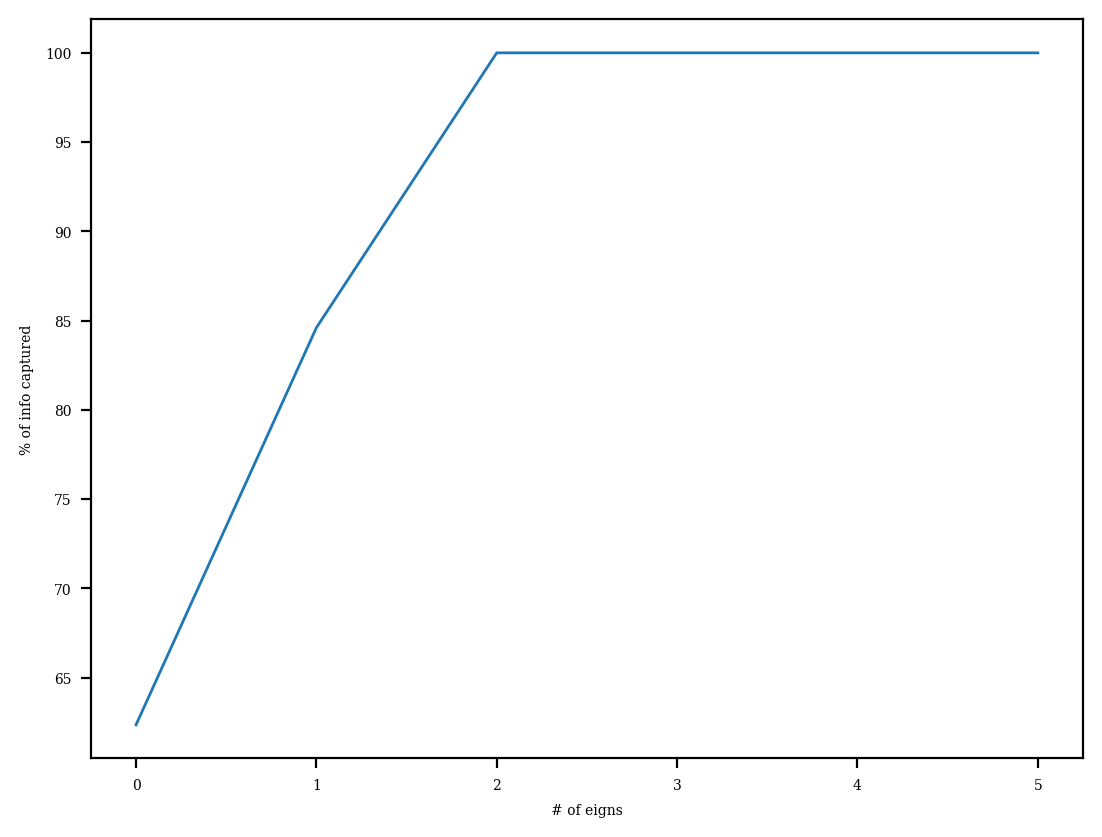

In [40]:
plt.plot( (np.cumsum(S.diagonal()) / sum(S.diagonal()))*100 )
plt.ylabel('% of info captured')
plt.xlabel('# of eigns')
plt.show()

In square matrix , we obtain orignal image almost 100% information with 3 eign_value and eign_vectors :)


`Note:`

any rectangular matrix can be represent as 3 smaller matrix  *_[Rotate]_  _[Stretch]_ _[Rotate]_*

- Rotate matix is parallel to Our Original Matrix. 
- Stretch matrix will preserve magnitude of Original Matix


<img src='./assets/Singular-Value-Decomposition.png'> </img>

In [41]:

theta = np.array([np.pi/15, -np.pi/9, -np.pi/20])
Sigma = np.diag([3, 1, 0.5]) # scale x, then y, then z


# Three dimensional rotational matrix

# Rotation about x axis
Rx = np.array([[1, 0, 0],
               [0, np.cos(theta[0]), -np.sin(theta[0])],
               [0, np.sin(theta[0]), np.cos(theta[0])]])

# Rotation about y axis
Ry = np.array([[np.cos(theta[1]), 0, np.sin(theta[1])],
               [0, 1, 0],
               [-np.sin(theta[1]), 0, np.cos(theta[1])]])

# Rotation about z axis
Rz = np.array([[np.cos(theta[2]), -np.sin(theta[2]), 0],
               [np.sin(theta[2]), np.cos(theta[2]), 0],
               [0, 0, 1]])

# Rotate and scale
X = Rz @ Ry @ Rx @ Sigma

In [42]:
print(f"theta:: {theta}")
print(f"Sigma::\n{Sigma}")
print(f"X::\n{X}")

theta:: [ 0.20943951 -0.34906585 -0.15707963]
Sigma::
[[3.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.  0.5]]
X::
[[ 2.78437034  0.08278149 -0.18147596]
 [-0.44100094  0.97722903 -0.0765087 ]
 [ 1.02606043  0.19537308  0.45957904]]


`Note:`

    SVD is more than dimensionality reduction concept :)

# Fourier Series

$$f(x) = \sum_{k=0}^{\inf} cos({k} {{2\pi x} \over{L}}) + b_{k} sin({k} {{2\pi x} \over{L}})$$
where,

$a_{k} = <f(x), cos({k} {{2\pi x} \over{L}})>$

$b_{k} = <f(x), sin({k} {{2\pi x} \over{L}})>$

In [43]:
from matplotlib.cm import get_cmap

In [44]:
plt.rcParams['figure.figsize'] = (3,3)
plt.rcParams.update({'font.size':6})

C:\Users\muthu\AppData\Local\Temp\ipykernel_16960\2803207748.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')


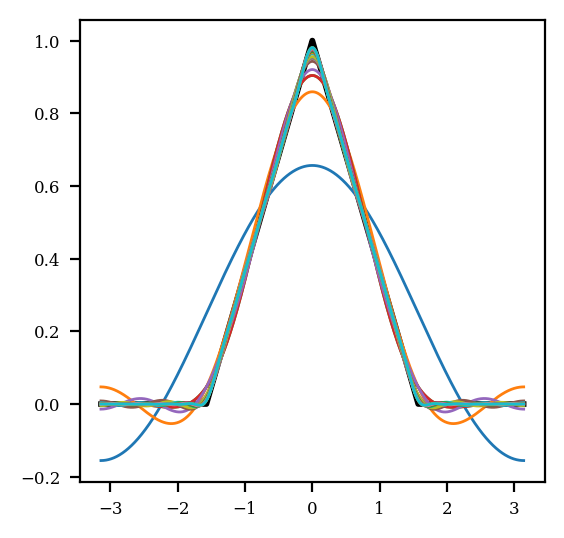

In [45]:
# Define domain
dx = 0.001
L = np.pi
x = L * np.arange(-1+dx,1+dx,dx)
n = len(x)
nquart = int(np.floor(n/4))

# Define hat function
f = np.zeros_like(x)
f[nquart:2*nquart] = (4/n)*np.arange(1,nquart+1)
f[2*nquart:3*nquart] = np.ones(nquart) - (4/n)*np.arange(0,nquart)

fig, ax = plt.subplots()
ax.plot(x,f,'-',color='k',linewidth=2)

# Compute Fourier series
name = "Accent"
cmap = get_cmap('tab10')
colors = cmap.colors
ax.set_prop_cycle(color=colors)

A0 = np.sum(f * np.ones_like(x)) * dx
fFS = A0/2

A = np.zeros(20)
B = np.zeros(20)
for k in range(20):
    A[k] = np.sum(f * np.cos(np.pi*(k+1)*x/L)) * dx # Inner product
    B[k] = np.sum(f * np.sin(np.pi*(k+1)*x/L)) * dx
    fFS = fFS + A[k]*np.cos((k+1)*np.pi*x/L) + B[k]*np.sin((k+1)*np.pi*x/L)
    ax.plot(x,fFS,'-')

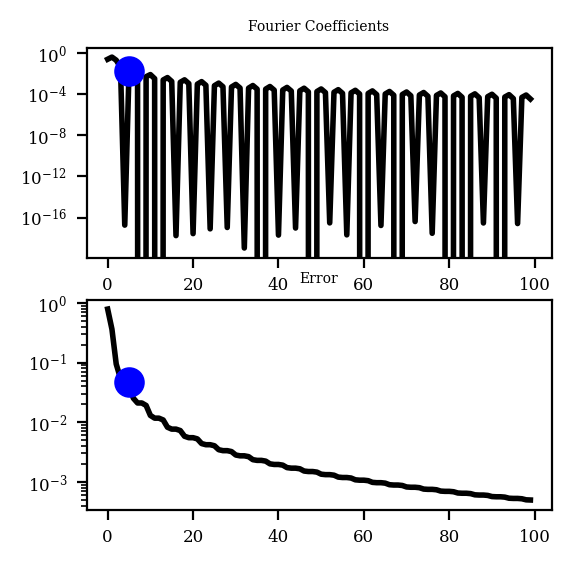

In [46]:
## Plot amplitudes

fFS = (A0/2) * np.ones_like(f)
kmax = 100
A = np.zeros(kmax)
B = np.zeros(kmax)
ERR = np.zeros(kmax)

A[0] = A0/2
ERR[0] = np.linalg.norm(f-fFS)/np.linalg.norm(f)

for k in range(1,kmax):
    A[k] = np.sum(f * np.cos(np.pi*k*x/L)) * dx
    B[k] = np.sum(f * np.sin(np.pi*k*x/L)) * dx
    fFS = fFS + A[k] * np.cos(k*np.pi*x/L) + B[k] * np.sin(k*np.pi*x/L)
    ERR[k] = np.linalg.norm(f-fFS)/np.linalg.norm(f)
    
thresh = np.median(ERR) * np.sqrt(kmax) * (4/np.sqrt(3))
r = np.max(np.where(ERR > thresh))

fig, axs = plt.subplots(2,1)
axs[0].semilogy(np.arange(kmax),A,color='k',linewidth=2)
axs[0].semilogy(r,A[r],'o',color='b',markersize=10)
plt.sca(axs[0])
plt.title('Fourier Coefficients')

axs[1].semilogy(np.arange(kmax),ERR,color='k',linewidth=2)
axs[1].semilogy(r,ERR[r],'o',color='b',markersize=10)
plt.sca(axs[1])
plt.title('Error')

plt.show()

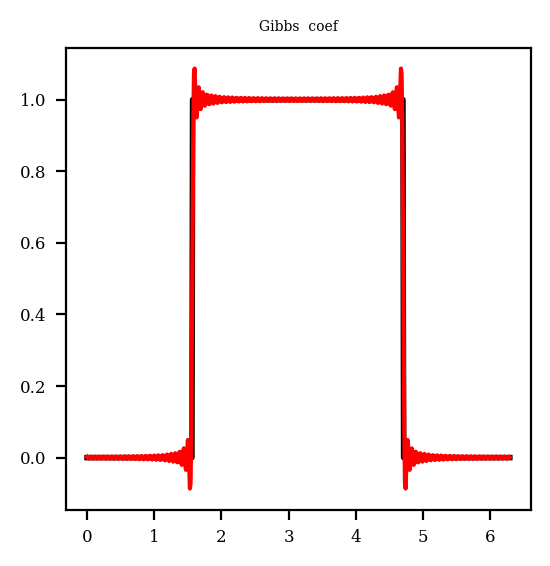

In [47]:

dx = 0.01
L = 2*np.pi
x = np.arange(0,L+dx,dx)
n = len(x)
nquart = int(np.floor(n/4))

f = np.zeros_like(x)
f[nquart:3*nquart] = 1

A0 = np.sum(f * np.ones_like(x)) * dx * 2 / L
fFS = A0/2 * np.ones_like(f)

for k in range(1,101):
    Ak = np.sum(f * np.cos(2*np.pi*k*x/L)) * dx * 2 / L
    Bk = np.sum(f * np.sin(2*np.pi*k*x/L)) * dx * 2 / L
    fFS = fFS + Ak*np.cos(2*k*np.pi*x/L) + Bk*np.sin(2*k*np.pi*x/L)
    
plt.plot(x,f,color='k',linewidth=2)
plt.plot(x,fFS,'-',color='r',linewidth=1.5)
plt.title("Gibbs  coef")
plt.show()

# Gradient Descent

# kalman Filter